# <center>Super bowl Prediction</center>

 **Authors: Chetan Naik | Sindhuri Mamidi | Ankit Arun | Beijie Li**

 **Modified by: Rakesh Chada**

**[Introduction](#intro)**

**[Data Cleaning & Extraction](#clean)**

**[NFL](#nfl_main)**

- [Baseline Models](Baseline_Super_Bowl.ipynb)

- [Advanced Models](#advanced_nfl)
    - [Linear Regression Model with separate features](#linreg_sep_nfl)
    - [Linear Regression Model with paired features](#linreg_paired_nfl)
    - [Page Rank Model](nfl_pagerank.ipynb)


**[College Football](#clg_main)**

- [Baseline Models](Baseline_Super_Bowl.ipynb)

- [Advanced Models](#advanced_clg)
    - [Linear Regression Model with separate features](#linreg_sep_clg)
    - [Linear Regression Model with paired features](#linreg_paired_clg)
    - [Page Rank Model](#clg_pagerank.ipynb)

<a id="intro"/>

## Introduction

The goal of this project is to build machine learning models to predict the winners of 2015 Super Bowl and the College Football Championship using historical data. 

We have predicted the outcome of football matches entirely using the knowledge of previous game statistics. We have used three different models to do this:
Baseline model : "Point Score Difference Model". In this model we use the score difference to predict winners of future games.
Linear Regression Model: In this model, we use linear regression to predict the point difference for each game.
PageRank Model: Here, we model the game data as a graph with nodes as teams and edges as score differences between the teams. We then use PageRank on this game graph to rank all the teams. This ranking is used to predict winners of future games.

In [172]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [173]:
from collections import defaultdict

import cPickle as pickle
import numpy as np
import pandas as pd
import pylab
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge

import warnings
warnings.filterwarnings('ignore')

In [174]:
import seaborn
colors = seaborn.color_palette()

from matplotlib import rc

rc("figure", facecolor="white")
rc("axes", facecolor="white")
rc("axes", edgecolor="grey")


rc("grid", alpha=0.9)
rc("grid", linewidth=0.2)
rc("grid", linestyle=":")


rc('font',**{'family':'serif','serif':['Palatino']})

<a id="clean"/>

# Data Cleaning and Extraction

In [175]:
trainDF = pd.DataFrame()
testDF = pd.DataFrame()
features = []

In [128]:
def setDataAndFeaturesForNFLSeparate(trDF,tstDF,ftr):
    trDF = pd.read_csv('data/trainNFL.csv', index_col=0)
    tstDF = pd.read_csv('data/testNFL.csv', index_col=0)
    ftr = ['temperature','humidity','wind_speed','away_team_id','home_team_id','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']
    ftr = ['temperature','humidity','wind_speed','away_team_id','home_team_id','over_or_under','visitor_point_spread','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']
    return (trDF,tstDF,ftr)

In [129]:
def setDataAndFeaturesForNFLPaired(trDF,tstDF,ftr):
    trDF = pd.read_csv('data/trainNFL_diff.csv', index_col=0)
    tstDF = pd.read_csv('data/testNFL_diff.csv', index_col=0)
    ftr = ['temperature','humidity','wind_speed','away_team_id','home_team_id','over_or_under','visitor_point_spread','1QP_diff','2QP_diff','3QP_diff','4QP_diff','RFD_diff','PFD_diff','IFD_diff','RY_diff','RA_diff','PY_diff','PA_diff','PC_diff','SK_diff','INT_diff','FUM_diff','PU_diff','GPY_diff','PR_diff','PRY_diff','KR_diff','KRY_diff','IR_diff','IRY_diff','PEN_diff','TOP_diff','TD_diff','TDR_diff','TDP_diff','TDT_diff','FGM_diff','FGAT_diff','FGY_diff','RZA_diff','RZC_diff','BRY_diff','BPY_diff','SRP_diff','S1RP_diff','S2RP_diff','S3RP_diff','SPP_diff','S1PP_diff','S2PP_diff','S3PP_diff','LEA_diff','LEY_diff','LTA_diff','LTY_diff','LGA_diff','LGY_diff','MDA_diff','MDY_diff','RGA_diff','RGY_diff','RTA_diff','RTY_diff','REA_diff','REY_diff','R1A_diff','R1Y_diff','R2A_diff','R2Y_diff','R3A_diff','R3Y_diff','QBA_diff','QBY_diff','SLA_diff','SLY_diff','SMA_diff','SMY_diff','SRA_diff','SRY_diff','DLA_diff','DLY_diff','DMA_diff','DMY_diff','DRA_diff','DRY_diff','WR1A_diff','WR1Y_diff','WR3A_diff','WR3Y_diff','TEA_diff','TEY_diff','RBA_diff','RBY_diff','SGA_diff','SGY_diff','P1A_diff','P1Y_diff','P2A_diff','P2Y_diff','P3A_diff','P3Y_diff','SPC_diff','MPC_diff','LPC_diff','Q1RA_diff','Q1RY_diff','Q1PA_diff','Q1PY_diff','LCRA_diff','LCRY_diff','LCPA_diff','LCPY_diff','RZRA_diff','RZRY_diff','RZPA_diff','RZPY_diff','SKY_diff','LBS_diff','DBS_diff','SFPY_diff','DRV_diff','NPY_diff','TB_diff','I20_diff','RTD_diff','LNR_diff','LNP_diff','LBR_diff','LBP_diff','DBR_diff','DBP_diff','NHA_diff','S3A_diff','S3C_diff','L3A_diff','L3C_diff','STF_diff','DP_diff','FSP_diff','OHP_diff','PBEP_diff','DLP_diff','DSP_diff','DMP_diff','PFN_diff']
    return (trDF,tstDF,ftr)

In [130]:
def setDataAndFeaturesForClgSeparate(trDF,tstDF,ftr):
    trDF = pd.read_csv('data/trainLinCOL.csv', index_col=0)
    tstDF = pd.read_csv('data/testLinCOL.csv', index_col=0)
    ftr = ['1st Downs_away','1st Downs_home','3rd Down Attempts_away','3rd Down Attempts_home','3rd Down Conversions_away','3rd Down Conversions_home','4th Down conversions_away','4th Down conversions_home','Fumbles Lost_away','Fumbles Lost_home','Passing Completions_away','Passing Completions_home','Passing Yards_away','Passing Yards_home','Penalties_away','Penalties_home','Penalty Yards_away','Penalty Yards_home','Rushing Attempts_away','Rushing Attempts_home','Rushing Yards_away','Rushing Yards_home','Time of Possession_away','Time of Possession_home','4th Down Attempts_away','4th Down Attempts_home','Interceptions Thrown_away','Interceptions Thrown_home','Passing Attempts_away','Passing Attempts_home']
    return (trDF,tstDF,ftr)

In [148]:
def setDataAndFeaturesForClgPaired(trDF,tstDF,ftr):
    trDF = pd.read_csv('data/trainCOL_diff.csv', index_col=0)
    tstDF = pd.read_csv('data/testCOL_diff.csv', index_col=0)
    ftr = ['1st Downs_diff','3rd Down Attempts_diff','3rd Down Conversions_diff','4th Down conversions_diff','Fumbles Lost_diff','Passing Completions_diff','Passing Yards_diff','Penalties_diff','Penalty Yards_diff','Rushing Attempts_diff','Rushing Yards_diff','Time of Possession_diff','4th Down Attempts_diff','Interceptions Thrown_diff','Passing Attempts_diff']
    return (trDF,tstDF,ftr)

<a id="nfl_main"/>

# NFL

<a id="advanced_nfl"/>

# Advanced Models

<a id="linreg_sep_nfl"/>

# Linear Regression Model with separate features

In [30]:
trainDF,testDF,features = setDataAndFeaturesForNFLSeparate(trainDF,testDF,features)

In [31]:
trainDF['score_diff'] = trainDF.home_score - trainDF.away_score
testDF['score_diff'] = testDF.home_score - testDF.away_score

trainDF = trainDF.sort(column='game_id').reset_index(drop=True)
testDF = testDF.sort(column='game_id').reset_index(drop=True)

In [32]:
#group = trainDF.groupby('away_team')
trainDF["away_team_id"] = trainDF.groupby(["away_team"]).grouper.group_info[0]
trainDF["home_team_id"] = trainDF.groupby(["home_team"]).grouper.group_info[0]
testDF["away_team_id"] = testDF.groupby(["away_team"]).grouper.group_info[0]
testDF["home_team_id"] = testDF.groupby(["home_team"]).grouper.group_info[0]

In [34]:
def get_correct(score_diff, predicted_score):
    if ((predicted_score > 0 and score_diff > 0) or (predicted_score < 0 and score_diff < 0)):
        return 1
    else:
        return 0

In [35]:
def check_accuracy(allStats):
    accuracy = dict()
    for year, df in allStats.iteritems():  
        #print df.correct_prediction
        numGames = len(df.correct_prediction)
        numCorrect = sum(df.correct_prediction)
        pctCorrect = numCorrect*100/float(numGames)
        accuracy[year] = [numGames, numCorrect, pctCorrect]
    return accuracy

In [36]:
def initialize(data):
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']
    
    reg = LinearRegression(fit_intercept=True, normalize=True)

    model = reg.fit(X, y)
    return model

In [37]:
def get_games_till_now(game, df):
    curGameId = int(game.game_id)
    retdf = df[df.game_id < curGameId]
    return retdf

In [38]:
def get_game_features(g, gamesTillNow):
    hTeam = g.home_team
    aTeam = g.away_team
    gameYear = int(g.year)

    games = []    
    for row, game in gamesTillNow.iterrows():
        rhTeam = game.home_team
        raTeam = game.away_team
        if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
            games.append(pd.DataFrame(game).T)
    games = games[-15:]
    numGames = len(games)
    games = pd.concat(games)
    average = pd.DataFrame(games[features].mean().round()).T
    return (numGames, average[features])

In [39]:
def get_updated_data(game, df, g):
    curGameId = int(game.game_id)
    retdf = df[df.game_id <= curGameId]
    return retdf[-g:]

In [40]:
def train_updated_model(data):
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']

    reg = LinearRegression(fit_intercept=True, normalize=True)

    model = reg.fit(X, y)
    return model

In [41]:
def run_model(model, gameFeatures):
    gameResult = int(model.predict(gameFeatures[features]).round())
    return gameResult

In [42]:
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','away_score','home_score','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']

In [43]:
# features = ['temperature','humidity','wind_speed','away_team_id','home_team_id','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']
# features.remove('TD_home')
# features.remove('FGM_home')
# features.remove('TD_away')
# features.remove('FGM_away')
# features.remove('TB_away')
#features.remove(['TD_home','FGM_home','TD_away','FGM_away','TB_away'])
#features = ['temperature','humidity','wind_speed','over_or_under','away_team_id','home_team_id']
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','1QP_home','2QP_home','3QP_home','1QP_away','2QP_away','3QP_away']

In [44]:
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away']


In [45]:
len(features)

283

In [46]:
clfs = [LinearRegression(fit_intercept=True),
        LinearRegression(fit_intercept=True, normalize=True),
        Ridge(fit_intercept=True),
        Ridge(fit_intercept=True, normalize=True),
        Lasso(fit_intercept=True),
        Lasso(fit_intercept=True, normalize=True)]
clf_names = ['Linear Regression', 'Linear Regression Normalized',
             'Ridge Regression', 'Ridge Regression Normalized',
             'Lasso Regression', 'Lasso Regression Normalized']

train_results = []
models = {}
for (i, clf_) in enumerate(clfs):
    data = trainDF[trainDF.year >= 2001]
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']
    clf = clf_.fit(X, y)
    models[clf_names[i]] = clf
    if clf_names[i] == 'Linear Regression':
        print clf.coef_
    predicted_train = clf.predict(X)
    p = [int(round(val)) for val in predicted_train]
    data['predicted_score_diff'] = pd.Series(p, index=data.index)
    data['correct_prediction'] = data.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(data.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = data[data.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [clf_names[i]]
    train_results.append(accuracy.T)

train_resultdf = pd.concat(train_results).T
train_resultdf

[ -7.15909968e-04  -3.82884348e-04  -2.57857390e-03  -1.01551877e-03
  -1.81026262e-03  -3.84643283e-03   4.33296818e-03   3.85672287e-01
   3.92056175e-01   3.93498903e-01   3.91761565e-01  -2.97867987e-03
   1.21043835e-03  -2.61931756e-02   1.11158163e-03  -5.20594708e-02
  -1.31725217e-06  -5.23578894e-03  -1.92438970e-02   1.67894601e-02
   4.99031674e-02   6.04000849e-02   5.24702765e-02  -2.63079330e-02
   2.85346182e-02  -1.53808994e-01   4.59006969e-02  -5.45700112e-04
  -4.74869504e-02   3.75645911e-04  -3.40108454e-03   1.65341640e-02
   3.97881358e+00   2.69805253e-01   2.96884003e-01  -8.30270228e-02
   1.85795718e+00   1.41163310e-02   5.42176258e-04  -2.46728002e-02
   2.82462446e-02   1.34647997e-03   3.57895356e-04  -1.57009773e-02
   4.59593876e-03   9.61372635e-03  -2.99106424e-02   6.01688172e-03
   1.19662390e-02   2.41344792e-02  -3.00838365e-02   3.16413565e-02
  -1.10946441e-04   2.97238333e-02  -1.25260390e-03   3.50066519e-02
  -1.11588160e-03   3.25234438e-02

,Linear Regression,Linear Regression Normalized,Ridge Regression,Ridge Regression Normalized,Lasso Regression,Lasso Regression Normalized
2001,100.000,100.000,100.000,92.903226,95.483871,54.193548
2002,99.375,99.375,99.375,93.125000,92.500000,59.375000
2003,98.750,98.750,98.750,93.750000,95.000000,61.875000
2004,100.000,100.000,100.000,93.125000,98.750000,55.000000
2005,100.000,100.000,100.000,91.875000,96.875000,56.875000
2006,99.375,99.375,99.375,91.250000,96.875000,53.125000
2007,99.375,99.375,99.375,97.500000,98.125000,54.375000
2008,99.375,99.375,99.375,93.750000,95.625000,56.250000
2009,100.000,100.000,100.000,92.500000,95.000000,58.125000
2010,100.000,100.000,100.000,96.875000,96.875000,57.500000


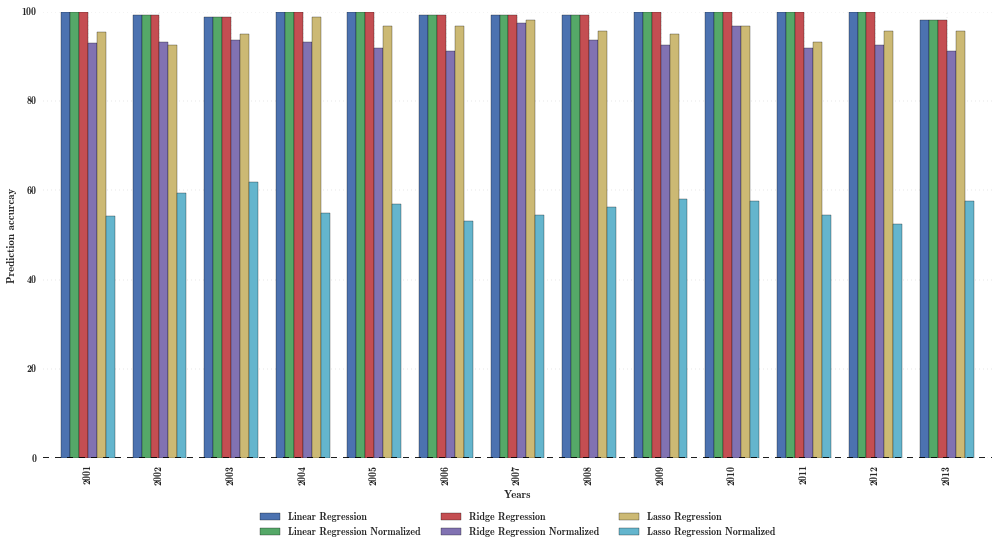

In [47]:
train_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

In [48]:
test_results = []
for model_name, model in models.iteritems():
    data_test = testDF[testDF.year > 2000]
    X_test = data_test.ix[:, features]
    y_test = data_test.ix[:, 'score_diff']
    predicted_test = model.predict(X_test)
    pt = [int(round(val)) for val in predicted_test]
    data_test['predicted_score_diff'] = pd.Series(pt, index=data_test.index)
    data_test['correct_prediction'] = data_test.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(data_test.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = data_test[data_test.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [model_name]
    test_results.append(accuracy.T)

test_resultdf = pd.concat(test_results).T
test_resultdf

,Ridge Regression Normalized,Lasso Regression Normalized,Lasso Regression,Ridge Regression,Linear Regression,Linear Regression Normalized
2001,95.192308,57.692308,97.115385,100.000000,100.000000,100.000000
2002,93.457944,57.943925,94.392523,99.065421,99.065421,99.065421
2003,93.457944,60.747664,97.196262,99.065421,99.065421,99.065421
2004,93.457944,58.878505,93.457944,99.065421,99.065421,99.065421
2005,94.392523,60.747664,96.261682,100.000000,100.000000,100.000000
2006,95.327103,55.140187,98.130841,100.000000,100.000000,100.000000
2007,95.327103,60.747664,95.327103,100.000000,100.000000,100.000000
2008,90.654206,57.009346,94.392523,98.130841,98.130841,98.130841
2009,90.654206,56.074766,94.392523,100.000000,100.000000,100.000000
2010,93.457944,52.336449,95.327103,99.065421,99.065421,99.065421


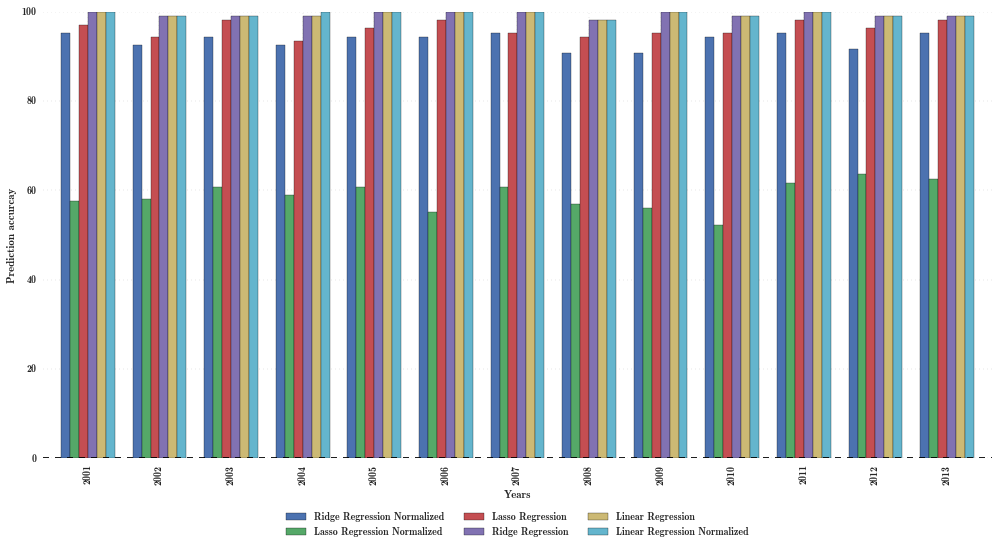

In [26]:
test_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

---

In [43]:
# def get_game_features(g, gamesTillNow, itr, alpha):
#     hTeam = g.home_team
#     aTeam = g.away_team
#     gameYear = int(g.year)

#     games = []    
#     for row, game in gamesTillNow.iterrows():
#         rhTeam = game.home_team
#         raTeam = game.away_team
#         if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
#             games.append(pd.DataFrame(game).T)
#     games = games[-itr:]
#     numGames = len(games)
#     games = pd.concat(games)
#     games = games[features]
    
#     numGames = len(games.index)
#     weights = []
#     for i in xrange(1, numGames+1):
#         weights.append(alpha**i)
#     weights = np.array(weights)
#     average = (games.mul(weights[::-1], axis=0)/float(sum(weights)))
#     average = pd.DataFrame(average.sum()).T.apply(np.round)
#     return (numGames, average[features])

In [49]:
def get_game_features(g, gamesTillNow, itr, alpha):
    hTeam = g.home_team
    aTeam = g.away_team
    gameYear = int(g.year)
    

    games = []    
#     for row, game in gamesTillNow.iterrows():
#         rhTeam = game.home_team
#         raTeam = game.away_team
#         if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
#             games.append(pd.DataFrame(game).T)
    games = gamesTillNow.loc[(((gamesTillNow['home_team']==hTeam) | (gamesTillNow['away_team']==aTeam))|((gamesTillNow['home_team']==aTeam) | (gamesTillNow['away_team']==hTeam))),features]
    #games = gamesTillNow.loc[gamesTillNow['home_team']==hTeam | gamesTillNow['home_team']==aTeam | gamesTillNow['away_team']==hTeam | gamesTillNow['away_team']==aTeam,features]
    #games = games[-itr:]
    numGames = len(games)
    #games = pd.concat(games)
    #games = games[features]
    
    numGames = len(games.index)
    weights = []
    for i in xrange(1, numGames+1):
        weights.append(alpha**i)
    weights = np.array(weights)
    average = (games.mul(weights[::-1], axis=0)/float(sum(weights)))
    average = pd.DataFrame(average.sum()).T.apply(np.round)
    return (numGames, average[features])

In [50]:
test2_results = []
for model_name, model in models.iteritems():
    itr = 15
    alpha = 1
    mtemp = []
    data_test = testDF[testDF.year > 2007]
    for ix, game in data_test.iterrows():
        gamesTillNow = get_games_till_now(game, data)
        numGames, gameFeatures = get_game_features(game, gamesTillNow, itr, alpha)
        #print gameFeatures
        gameResult = run_model(model, gameFeatures)
        mtemp.append(gameResult)

    data_test['predicted_score_diff'] = pd.Series(mtemp, index=data_test.index)
    cols = ['year', 'week', 'home_team', 'away_team', 'home_score', 'away_score', 'winner', 'score_diff', 'predicted_score_diff']
    process = data_test[cols]
    process['error'] = process.score_diff - process.predicted_score_diff
    process['correct_prediction'] = process.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(process.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = process[process.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [model_name]
    test2_results.append(accuracy.T)
    
test2_resultdf = pd.concat(test2_results).T
test2_resultdf

,Ridge Regression Normalized,Lasso Regression Normalized,Lasso Regression,Ridge Regression,Linear Regression,Linear Regression Normalized
2008,57.009346,57.009346,54.205607,49.532710,54.205607,50.467290
2009,56.074766,56.074766,51.401869,52.336449,48.598131,48.598131
2010,52.336449,52.336449,46.728972,50.467290,51.401869,49.532710
2011,61.682243,61.682243,57.009346,56.074766,59.813084,41.121495
2012,63.551402,63.551402,57.009346,59.813084,63.551402,43.925234
2013,62.616822,62.616822,57.943925,59.813084,61.682243,50.467290


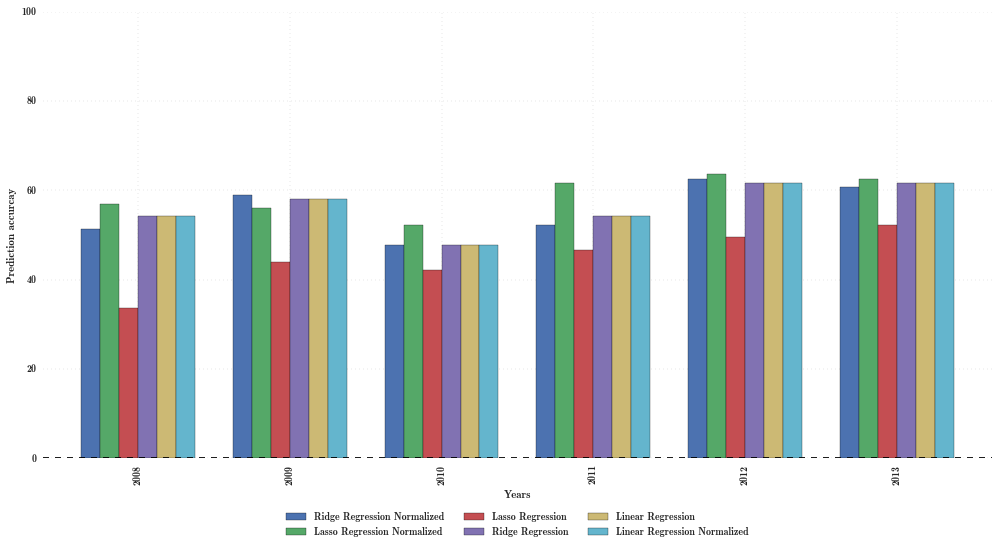

In [27]:
test2_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

<a id='linreg_paired_nfl'/>

<a id="linreg_paired_nfl"/>

# Linear Regression Model with paired features

In [79]:
trainDF,testDF,features = setDataAndFeaturesForNFLPaired(trainDF,testDF,features)

In [80]:
trainDF['score_diff'] = trainDF.home_score - trainDF.away_score
testDF['score_diff'] = testDF.home_score - testDF.away_score

trainDF = trainDF.sort(column='game_id').reset_index(drop=True)
testDF = testDF.sort(column='game_id').reset_index(drop=True)

In [81]:
#group = trainDF.groupby('away_team')
trainDF["away_team_id"] = trainDF.groupby(["away_team"]).grouper.group_info[0]
trainDF["home_team_id"] = trainDF.groupby(["home_team"]).grouper.group_info[0]
testDF["away_team_id"] = testDF.groupby(["away_team"]).grouper.group_info[0]
testDF["home_team_id"] = testDF.groupby(["home_team"]).grouper.group_info[0]

In [82]:
def get_correct(score_diff, predicted_score):
    if ((predicted_score > 0 and score_diff > 0) or (predicted_score < 0 and score_diff < 0)):
        return 1
    else:
        return 0

In [83]:
def check_accuracy(allStats):
    accuracy = dict()
    for year, df in allStats.iteritems():  
        #print df.correct_prediction
        numGames = len(df.correct_prediction)
        numCorrect = sum(df.correct_prediction)
        pctCorrect = numCorrect*100/float(numGames)
        accuracy[year] = [numGames, numCorrect, pctCorrect]
    return accuracy

In [84]:
def initialize(data):
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']
    
    reg = LinearRegression(fit_intercept=True, normalize=True)

    model = reg.fit(X, y)
    return model

In [85]:
def get_games_till_now(game, df):
    curGameId = int(game.game_id)
    retdf = df[df.game_id < curGameId]
    return retdf

In [86]:
def get_game_features(g, gamesTillNow):
    hTeam = g.home_team
    aTeam = g.away_team
    gameYear = int(g.year)

    games = []    
    for row, game in gamesTillNow.iterrows():
        rhTeam = game.home_team
        raTeam = game.away_team
        if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
            games.append(pd.DataFrame(game).T)
    games = games[-15:]
    numGames = len(games)
    games = pd.concat(games)
    average = pd.DataFrame(games[features].mean().round()).T
    return (numGames, average[features])

In [87]:
def get_updated_data(game, df, g):
    curGameId = int(game.game_id)
    retdf = df[df.game_id <= curGameId]
    return retdf[-g:]

In [88]:
def train_updated_model(data):
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']

    reg = LinearRegression(fit_intercept=True, normalize=True)

    model = reg.fit(X, y)
    return model

In [89]:
def run_model(model, gameFeatures):
    gameResult = int(model.predict(gameFeatures[features]).round())
    return gameResult

In [90]:
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','away_score','home_score','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']

In [91]:
# features = ['temperature','humidity','wind_speed','away_team_id','home_team_id','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']
# features.remove('TD_home')
# features.remove('FGM_home')
# features.remove('TD_away')
# features.remove('FGM_away')
# features.remove('TB_away')
#features.remove(['TD_home','FGM_home','TD_away','FGM_away','TB_away'])
#features = ['temperature','humidity','wind_speed','over_or_under','away_team_id','home_team_id']
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','1QP_home','2QP_home','3QP_home','1QP_away','2QP_away','3QP_away']

In [92]:
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away']


In [93]:
len(features)

145

In [101]:
clfs = [LinearRegression(fit_intercept=True),
        LinearRegression(fit_intercept=True, normalize=True),
        Ridge(fit_intercept=True),
        Ridge(fit_intercept=True, normalize=True),
        Lasso(fit_intercept=True),
        Lasso(fit_intercept=True, normalize=True)]
clf_names = ['Linear Regression', 'Linear Regression Normalized',
             'Ridge Regression', 'Ridge Regression Normalized',
             'Lasso Regression', 'Lasso Regression Normalized']

train_results = []
models = {}
for (i, clf_) in enumerate(clfs):
    data = trainDF[trainDF.year >= 2001]
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']
    clf = clf_.fit(X, y)
    models[clf_names[i]] = clf
    if clf_names[i] == 'Ridge Regression Normalized':
        print clf.coef_
    predicted_train = clf.predict(X)
    p = [int(round(val)) for val in predicted_train]
    data['predicted_score_diff'] = pd.Series(p, index=data.index)
    data['correct_prediction'] = data.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(data.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = data[data.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [clf_names[i]]
    train_results.append(accuracy.T)

train_resultdf = pd.concat(train_results).T
train_resultdf

[ -4.51100301e-03   1.20410097e-03  -8.23425689e-04  -1.25718418e-03
  -3.82653671e-03   1.30144859e-02   7.76398953e-02   1.12906299e-01
   1.18424996e-01   1.30725624e-01   1.52494639e-01   4.32216641e-02
   5.54963950e-02   4.65576067e-02   2.49193103e-03   6.58978508e-03
   3.40673746e-03  -2.74945751e-02   7.79269725e-03  -1.04631630e-01
  -3.73276556e-01  -6.51072965e-01  -1.55074968e-01  -1.42191894e-03
   3.10985457e-02   4.99939671e-03  -3.27913146e-01  -6.52293291e-03
   3.73276556e-01   1.19854706e-02  -6.41221544e-03   7.68703752e-03
   9.47889927e-01   6.82325551e-01   8.98269453e-01   1.00652752e+00
   2.50822718e-01   2.81507070e-02   8.38019115e-03   1.45090761e-01
   5.77881420e-01   4.55018709e-03   5.40907987e-03   1.72466668e-02
   2.59646094e-02   2.54515835e-02   7.60142377e-02   2.26689214e-02
  -1.68754755e-03   4.37153554e-02   8.69240505e-02   2.47879101e-02
   3.80687171e-03   3.06771532e-02   3.75870765e-03   1.53605507e-02
   2.96470624e-03   1.47272814e-04

,Linear Regression,Linear Regression Normalized,Ridge Regression,Ridge Regression Normalized,Lasso Regression,Lasso Regression Normalized
2001,100.000,100.000,100.000,92.258065,97.419355,54.193548
2002,99.375,99.375,99.375,93.125000,95.000000,59.375000
2003,98.750,98.750,98.750,92.500000,95.000000,61.875000
2004,100.000,100.000,100.000,94.375000,99.375000,55.000000
2005,99.375,99.375,99.375,90.625000,96.250000,56.875000
2006,99.375,99.375,99.375,90.625000,96.875000,53.125000
2007,100.000,100.000,100.000,96.250000,98.125000,54.375000
2008,99.375,99.375,99.375,92.500000,96.250000,56.250000
2009,100.000,100.000,100.000,93.125000,96.250000,58.125000
2010,100.000,100.000,100.000,95.625000,97.500000,57.500000


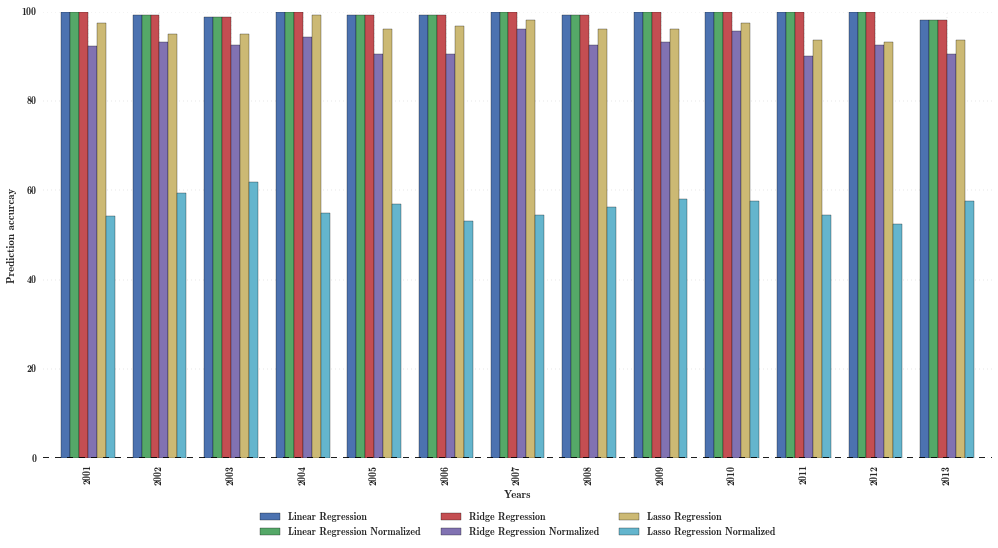

In [95]:
train_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

In [96]:
test_results = []
for model_name, model in models.iteritems():
    data_test = testDF[testDF.year > 2000]
    X_test = data_test.ix[:, features]
    y_test = data_test.ix[:, 'score_diff']
    predicted_test = model.predict(X_test)
    pt = [int(round(val)) for val in predicted_test]
    data_test['predicted_score_diff'] = pd.Series(pt, index=data_test.index)
    data_test['correct_prediction'] = data_test.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(data_test.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = data_test[data_test.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [model_name]
    test_results.append(accuracy.T)

test_resultdf = pd.concat(test_results).T
test_resultdf

,Ridge Regression Normalized,Lasso Regression Normalized,Lasso Regression,Ridge Regression,Linear Regression,Linear Regression Normalized
2001,94.230769,57.692308,97.115385,100.000000,100.000000,100.000000
2002,94.392523,57.943925,95.327103,99.065421,99.065421,99.065421
2003,94.392523,60.747664,98.130841,99.065421,99.065421,98.130841
2004,90.654206,58.878505,93.457944,100.000000,100.000000,100.000000
2005,94.392523,60.747664,95.327103,100.000000,100.000000,100.000000
2006,95.327103,55.140187,97.196262,100.000000,100.000000,100.000000
2007,96.261682,60.747664,95.327103,99.065421,99.065421,99.065421
2008,91.588785,57.009346,94.392523,98.130841,98.130841,98.130841
2009,91.588785,56.074766,95.327103,100.000000,100.000000,100.000000
2010,92.523364,52.336449,94.392523,99.065421,99.065421,99.065421


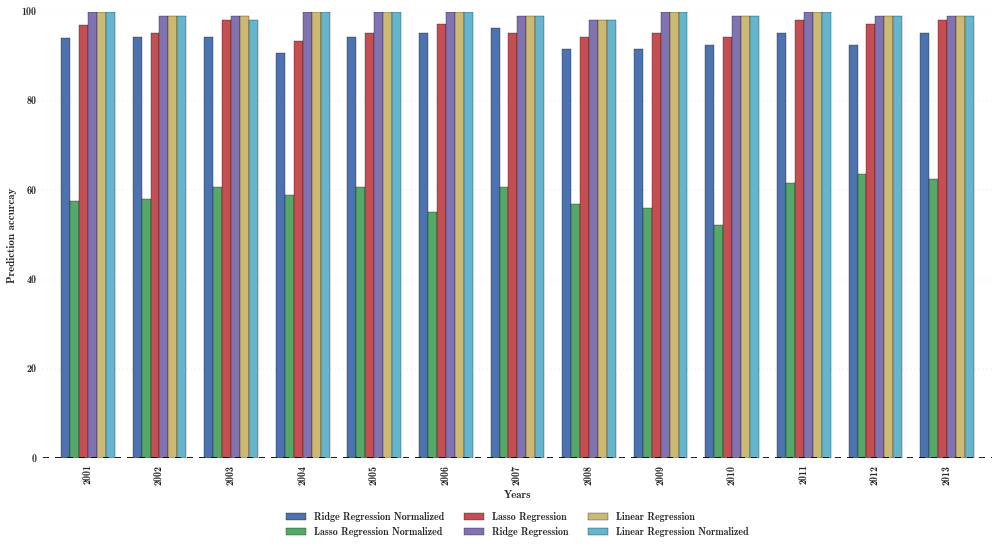

In [97]:
test_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

---

In [98]:
# def get_game_features(g, gamesTillNow, itr, alpha):
#     hTeam = g.home_team
#     aTeam = g.away_team
#     gameYear = int(g.year)

#     games = []    
#     for row, game in gamesTillNow.iterrows():
#         rhTeam = game.home_team
#         raTeam = game.away_team
#         if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
#             games.append(pd.DataFrame(game).T)
#     games = games[-itr:]
#     numGames = len(games)
#     games = pd.concat(games)
#     games = games[features]
    
#     numGames = len(games.index)
#     weights = []
#     for i in xrange(1, numGames+1):
#         weights.append(alpha**i)
#     weights = np.array(weights)
#     average = (games.mul(weights[::-1], axis=0)/float(sum(weights)))
#     average = pd.DataFrame(average.sum()).T.apply(np.round)
#     return (numGames, average[features])

In [99]:
def get_game_features(g, gamesTillNow, itr, alpha):
    hTeam = g.home_team
    aTeam = g.away_team
    gameYear = int(g.year)
    

    games = []    
#     for row, game in gamesTillNow.iterrows():
#         rhTeam = game.home_team
#         raTeam = game.away_team
#         if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
#             games.append(pd.DataFrame(game).T)
    games = gamesTillNow.loc[(((gamesTillNow['home_team']==hTeam) | (gamesTillNow['away_team']==aTeam))|((gamesTillNow['home_team']==aTeam) | (gamesTillNow['away_team']==hTeam))),features]
    #games = gamesTillNow.loc[gamesTillNow['home_team']==hTeam | gamesTillNow['home_team']==aTeam | gamesTillNow['away_team']==hTeam | gamesTillNow['away_team']==aTeam,features]
    #games = games[-itr:]
    numGames = len(games)
    #games = pd.concat(games)
    #games = games[features]
    
    numGames = len(games.index)
    weights = []
    for i in xrange(1, numGames+1):
        weights.append(alpha**i)
    weights = np.array(weights)
    average = (games.mul(weights[::-1], axis=0)/float(sum(weights)))
    average = pd.DataFrame(average.sum()).T.apply(np.round)
    return (numGames, average[features])

In [100]:
test2_results = []
for model_name, model in models.iteritems():
    itr = 15
    alpha = 1
    mtemp = []
    data_test = testDF[testDF.year > 2007]
    for ix, game in data_test.iterrows():
        gamesTillNow = get_games_till_now(game, data)
        numGames, gameFeatures = get_game_features(game, gamesTillNow, itr, alpha)
        #print gameFeatures
        gameResult = run_model(model, gameFeatures)
        mtemp.append(gameResult)

    data_test['predicted_score_diff'] = pd.Series(mtemp, index=data_test.index)
    cols = ['year', 'week', 'home_team', 'away_team', 'home_score', 'away_score', 'winner', 'score_diff', 'predicted_score_diff']
    process = data_test[cols]
    process['error'] = process.score_diff - process.predicted_score_diff
    process['correct_prediction'] = process.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(process.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = process[process.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [model_name]
    test2_results.append(accuracy.T)
    
test2_resultdf = pd.concat(test2_results).T
test2_resultdf

,Ridge Regression Normalized,Lasso Regression Normalized,Lasso Regression,Ridge Regression,Linear Regression,Linear Regression Normalized
2008,56.074766,57.009346,55.140187,46.728972,49.532710,45.794393
2009,55.140187,56.074766,51.401869,42.990654,48.598131,45.794393
2010,51.401869,52.336449,49.532710,42.990654,44.859813,52.336449
2011,60.747664,61.682243,58.878505,47.663551,41.121495,55.140187
2012,62.616822,63.551402,60.747664,53.271028,47.663551,50.467290
2013,62.616822,62.616822,62.616822,50.467290,50.467290,48.598131


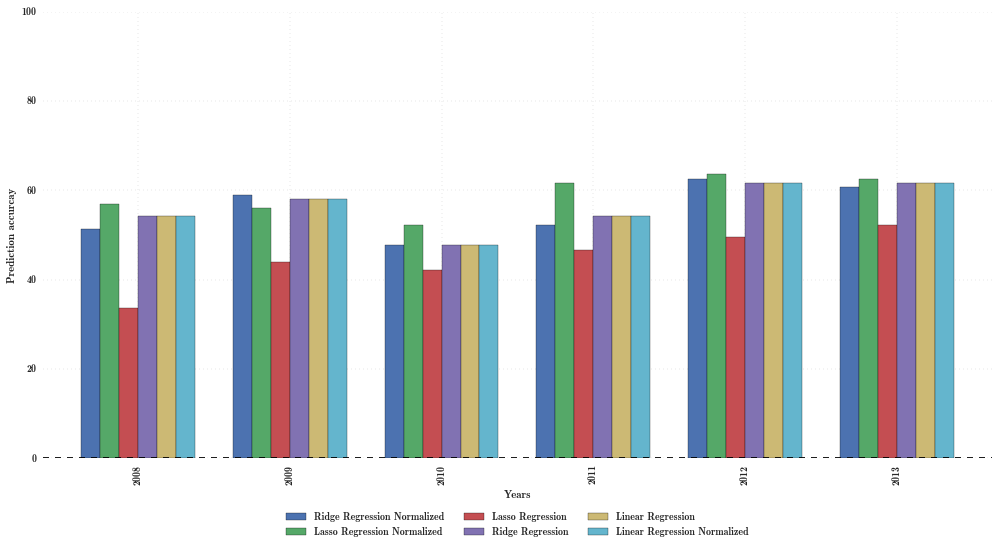

In [27]:
test2_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

---

Notes-

1 - away_score and home_score should be removed from training features
2 - optimized performance by using dfs instead of manual iteration
3 - subset of features works much better (results in a separate notebook)
4 - overfitting (training error 0 (due to large num of features?))
5 - predicted current features by linear interpolation (using alpha(weight control=0.9) and num previous games(15))..results
in error when predicting over 285 features (all games which either team is part of are considered)-modified this to include
those in which 'both' participated (Either as away or as home) and also by setting alpha = 1 and removing num previous games
6 - less training data (2500 rows) considering 285 features
7 - vast number of features makes Lasso a more meaningful choice (many co-effs are zero and hence useful for parameter selection)..normalized lasso has all co-efs zero and hence a consistent prediction all the time (intercept)
8 - over_or_under and visitor_point_spread features have high impact on lin. reg.
9 - modularization of notebooks - main diff. is dataset n features..so split acc. to that..combined all baseline..
10 - new features for team ids to capture team info

# College Football

<a id="advanced_clg"/>

# Advanced Models

<a id="linreg_sep_clg"/>

# Linear Regression Model with separate features

In [131]:
trainDF,testDF,features = setDataAndFeaturesForClgSeparate(trainDF,testDF,features)

In [132]:
trainDF['score_diff'] = trainDF.home_score - trainDF.away_score
testDF['score_diff'] = testDF.home_score - testDF.away_score

trainDF = trainDF.sort(column='game_id').reset_index(drop=True)
testDF = testDF.sort(column='game_id').reset_index(drop=True)

In [133]:
#group = trainDF.groupby('away_team')
trainDF["away_team_id"] = trainDF.groupby(["away_team"]).grouper.group_info[0]
trainDF["home_team_id"] = trainDF.groupby(["home_team"]).grouper.group_info[0]
testDF["away_team_id"] = testDF.groupby(["away_team"]).grouper.group_info[0]
testDF["home_team_id"] = testDF.groupby(["home_team"]).grouper.group_info[0]

In [134]:
def get_correct(score_diff, predicted_score):
    if ((predicted_score > 0 and score_diff > 0) or (predicted_score < 0 and score_diff < 0)):
        return 1
    else:
        return 0

In [135]:
def check_accuracy(allStats):
    accuracy = dict()
    for year, df in allStats.iteritems():  
        #print df.correct_prediction
        numGames = len(df.correct_prediction)
        numCorrect = sum(df.correct_prediction)
        pctCorrect = numCorrect*100/float(numGames)
        accuracy[year] = [numGames, numCorrect, pctCorrect]
    return accuracy

In [136]:
def initialize(data):
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']
    
    reg = LinearRegression(fit_intercept=True, normalize=True)

    model = reg.fit(X, y)
    return model

In [137]:
def get_games_till_now(game, df):
    curGameId = int(game.game_id)
    retdf = df[df.game_id < curGameId]
    return retdf

In [138]:
def get_game_features(g, gamesTillNow):
    hTeam = g.home_team
    aTeam = g.away_team
    gameYear = int(g.year)

    games = []    
    for row, game in gamesTillNow.iterrows():
        rhTeam = game.home_team
        raTeam = game.away_team
        if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
            games.append(pd.DataFrame(game).T)
    games = games[-15:]
    numGames = len(games)
    games = pd.concat(games)
    average = pd.DataFrame(games[features].mean().round()).T
    return (numGames, average[features])

In [139]:
def get_updated_data(game, df, g):
    curGameId = int(game.game_id)
    retdf = df[df.game_id <= curGameId]
    return retdf[-g:]

In [140]:
def train_updated_model(data):
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']

    reg = LinearRegression(fit_intercept=True, normalize=True)

    model = reg.fit(X, y)
    return model

In [141]:
def run_model(model, gameFeatures):
    gameResult = int(model.predict(gameFeatures[features]).round())
    return gameResult

In [142]:
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','away_score','home_score','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']

In [143]:
# features = ['temperature','humidity','wind_speed','away_team_id','home_team_id','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']
# features.remove('TD_home')
# features.remove('FGM_home')
# features.remove('TD_away')
# features.remove('FGM_away')
# features.remove('TB_away')
#features.remove(['TD_home','FGM_home','TD_away','FGM_away','TB_away'])
#features = ['temperature','humidity','wind_speed','over_or_under','away_team_id','home_team_id']
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','1QP_home','2QP_home','3QP_home','1QP_away','2QP_away','3QP_away']

In [144]:
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away']


In [145]:
len(features)

32

In [147]:
clfs = [LinearRegression(fit_intercept=True),
        LinearRegression(fit_intercept=True, normalize=True),
        Ridge(fit_intercept=True),
        Ridge(fit_intercept=True, normalize=True),
        Lasso(fit_intercept=True),
        Lasso(fit_intercept=True, normalize=True)]
clf_names = ['Linear Regression', 'Linear Regression Normalized',
             'Ridge Regression', 'Ridge Regression Normalized',
             'Lasso Regression', 'Lasso Regression Normalized']

train_results = []
models = {}
for (i, clf_) in enumerate(clfs):
    data = trainDF[trainDF.year >= 2001]
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']
    clf = clf_.fit(X, y)
    models[clf_names[i]] = clf
    if clf_names[i] == 'Ridge Regression Normalized':
        print clf.coef_
    predicted_train = clf.predict(X)
    p = [int(round(val)) for val in predicted_train]
    data['predicted_score_diff'] = pd.Series(p, index=data.index)
    data['correct_prediction'] = data.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(data.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = data[data.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [clf_names[i]]
    train_results.append(accuracy.T)

train_resultdf = pd.concat(train_results).T
train_resultdf

[  1.00000000e+00  -1.00000000e+00  -2.22077131e-15   5.91280497e-15
  -3.35842465e-15  -5.54764568e-15   1.08940634e-15   2.50841015e-15
  -1.66533454e-16   2.01227923e-15  -1.96717642e-15  -2.06085149e-15
   1.45386090e-15   3.24393290e-16   3.19419513e-16  -2.63284945e-16
   3.08184468e-15  -3.68986525e-15  -2.74541674e-15   2.35992866e-15
   5.72599693e-15  -3.58545658e-16  -8.69665668e-17  -2.73828811e-16
  -7.84301687e-17   1.37798708e-16  -3.01841885e-16   2.57086019e-15
   2.55351296e-15  -2.84147705e-15   3.31332184e-16   5.48606299e-16]


,Linear Regression,Linear Regression Normalized,Ridge Regression,Ridge Regression Normalized,Lasso Regression,Lasso Regression Normalized
2005,100,100,100,91.860465,100,60.930233
2006,100,100,100,90.526316,100,62.105263
2007,100,100,100,89.473684,100,62.526316
2008,100,100,100,92.531120,100,61.825726
2009,100,100,100,92.768595,100,64.876033
2010,100,100,100,91.322314,100,59.297521
2011,100,100,100,92.402464,100,65.092402
2012,100,100,100,91.035857,100,61.952191
2013,100,100,100,93.223819,100,60.574949
2014,100,100,100,92.540323,100,61.088710


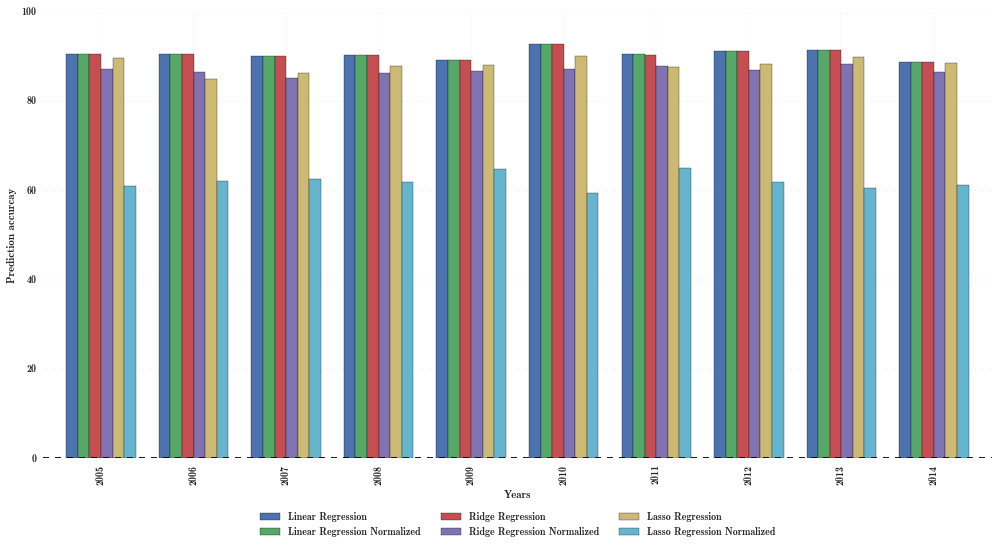

In [119]:
train_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

In [120]:
test_results = []
for model_name, model in models.iteritems():
    data_test = testDF[testDF.year > 2000]
    X_test = data_test.ix[:, features]
    y_test = data_test.ix[:, 'score_diff']
    predicted_test = model.predict(X_test)
    pt = [int(round(val)) for val in predicted_test]
    data_test['predicted_score_diff'] = pd.Series(pt, index=data_test.index)
    data_test['correct_prediction'] = data_test.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(data_test.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = data_test[data_test.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [model_name]
    test_results.append(accuracy.T)

test_resultdf = pd.concat(test_results).T
test_resultdf

,Ridge Regression Normalized,Lasso Regression Normalized,Lasso Regression,Ridge Regression,Linear Regression,Linear Regression Normalized
2005,83.333333,57.638889,86.458333,88.541667,88.541667,88.541667
2006,85.488959,61.514196,89.274448,90.220820,90.220820,90.220820
2007,89.274448,62.145110,90.536278,93.059937,93.059937,93.059937
2008,85.714286,63.975155,87.577640,92.236025,92.236025,92.236025
2009,88.271605,61.728395,89.814815,91.975309,91.975309,91.975309
2010,87.962963,62.345679,88.888889,90.740741,90.740741,90.740741
2011,84.923077,61.846154,86.769231,89.846154,89.846154,89.846154
2012,87.202381,59.821429,87.202381,90.773810,90.773810,90.773810
2013,89.877301,64.110429,92.944785,93.865031,93.865031,93.865031
2014,83.081571,60.422961,88.519637,88.821752,88.821752,88.821752


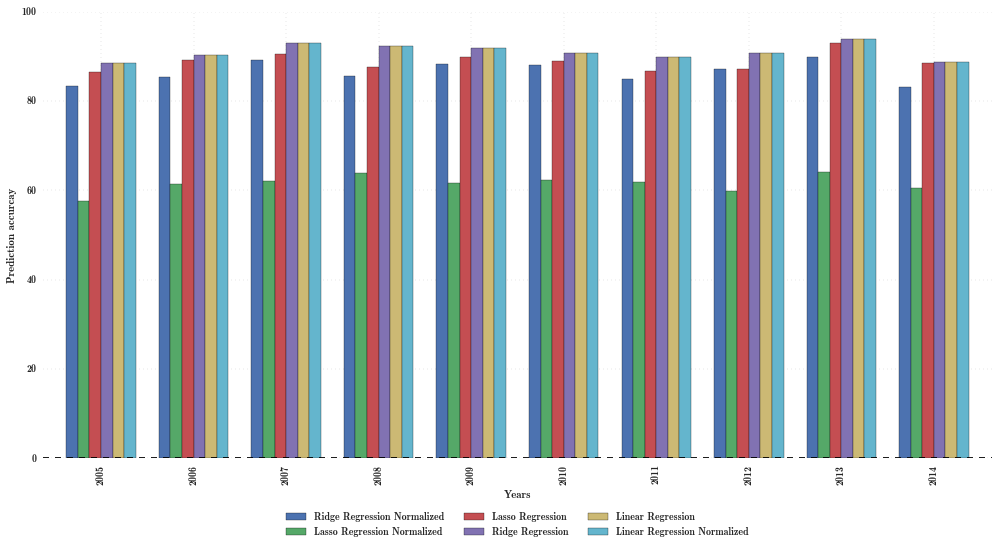

In [121]:
test_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

---

In [98]:
# def get_game_features(g, gamesTillNow, itr, alpha):
#     hTeam = g.home_team
#     aTeam = g.away_team
#     gameYear = int(g.year)

#     games = []    
#     for row, game in gamesTillNow.iterrows():
#         rhTeam = game.home_team
#         raTeam = game.away_team
#         if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
#             games.append(pd.DataFrame(game).T)
#     games = games[-itr:]
#     numGames = len(games)
#     games = pd.concat(games)
#     games = games[features]
    
#     numGames = len(games.index)
#     weights = []
#     for i in xrange(1, numGames+1):
#         weights.append(alpha**i)
#     weights = np.array(weights)
#     average = (games.mul(weights[::-1], axis=0)/float(sum(weights)))
#     average = pd.DataFrame(average.sum()).T.apply(np.round)
#     return (numGames, average[features])

In [122]:
def get_game_features(g, gamesTillNow, itr, alpha):
    hTeam = g.home_team
    aTeam = g.away_team
    gameYear = int(g.year)
    

    games = []    
#     for row, game in gamesTillNow.iterrows():
#         rhTeam = game.home_team
#         raTeam = game.away_team
#         if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
#             games.append(pd.DataFrame(game).T)
    games = gamesTillNow.loc[(((gamesTillNow['home_team']==hTeam) | (gamesTillNow['away_team']==aTeam))|((gamesTillNow['home_team']==aTeam) | (gamesTillNow['away_team']==hTeam))),features]
    #games = gamesTillNow.loc[gamesTillNow['home_team']==hTeam | gamesTillNow['home_team']==aTeam | gamesTillNow['away_team']==hTeam | gamesTillNow['away_team']==aTeam,features]
    #games = games[-itr:]
    numGames = len(games)
    #games = pd.concat(games)
    #games = games[features]
    
    numGames = len(games.index)
    weights = []
    for i in xrange(1, numGames+1):
        weights.append(alpha**i)
    weights = np.array(weights)
    average = (games.mul(weights[::-1], axis=0)/float(sum(weights)))
    average = pd.DataFrame(average.sum()).T.apply(np.round)
    return (numGames, average[features])

In [123]:
test2_results = []
for model_name, model in models.iteritems():
    itr = 15
    alpha = 1
    mtemp = []
    data_test = testDF[testDF.year > 2007]
    for ix, game in data_test.iterrows():
        gamesTillNow = get_games_till_now(game, data)
        numGames, gameFeatures = get_game_features(game, gamesTillNow, itr, alpha)
        #print gameFeatures
        gameResult = run_model(model, gameFeatures)
        mtemp.append(gameResult)

    data_test['predicted_score_diff'] = pd.Series(mtemp, index=data_test.index)
    cols = ['year', 'week', 'home_team', 'away_team', 'home_score', 'away_score', 'winner', 'score_diff', 'predicted_score_diff']
    process = data_test[cols]
    process['error'] = process.score_diff - process.predicted_score_diff
    process['correct_prediction'] = process.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(process.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = process[process.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [model_name]
    test2_results.append(accuracy.T)
    
test2_resultdf = pd.concat(test2_results).T
test2_resultdf

,Ridge Regression Normalized,Lasso Regression Normalized,Lasso Regression,Ridge Regression,Linear Regression,Linear Regression Normalized
2008,63.975155,63.975155,63.043478,62.422360,62.422360,62.422360
2009,61.728395,61.728395,61.111111,60.185185,60.185185,60.185185
2010,62.345679,62.345679,62.037037,60.802469,60.802469,60.802469
2011,61.846154,61.846154,61.846154,61.230769,61.230769,61.230769
2012,59.821429,59.821429,59.821429,59.821429,59.821429,59.821429
2013,64.110429,64.110429,64.110429,62.576687,62.576687,62.576687
2014,60.422961,60.422961,60.422961,61.027190,61.027190,61.027190


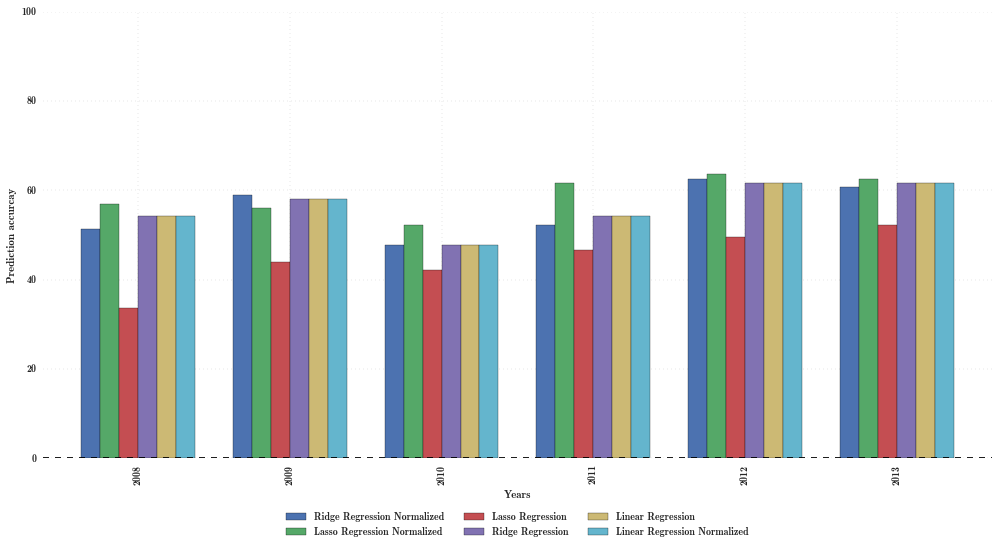

In [27]:
test2_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

---

<a id="linreg_paired_clg"/>

# Linear Regression Model with paired features

In [149]:
trainDF,testDF,features = setDataAndFeaturesForClgPaired(trainDF,testDF,features)

In [150]:
trainDF['score_diff'] = trainDF.home_score - trainDF.away_score
testDF['score_diff'] = testDF.home_score - testDF.away_score

trainDF = trainDF.sort(column='game_id').reset_index(drop=True)
testDF = testDF.sort(column='game_id').reset_index(drop=True)

In [151]:
#group = trainDF.groupby('away_team')
trainDF["away_team_id"] = trainDF.groupby(["away_team"]).grouper.group_info[0]
trainDF["home_team_id"] = trainDF.groupby(["home_team"]).grouper.group_info[0]
testDF["away_team_id"] = testDF.groupby(["away_team"]).grouper.group_info[0]
testDF["home_team_id"] = testDF.groupby(["home_team"]).grouper.group_info[0]

In [152]:
def get_correct(score_diff, predicted_score):
    if ((predicted_score > 0 and score_diff > 0) or (predicted_score < 0 and score_diff < 0)):
        return 1
    else:
        return 0

In [153]:
def check_accuracy(allStats):
    accuracy = dict()
    for year, df in allStats.iteritems():  
        #print df.correct_prediction
        numGames = len(df.correct_prediction)
        numCorrect = sum(df.correct_prediction)
        pctCorrect = numCorrect*100/float(numGames)
        accuracy[year] = [numGames, numCorrect, pctCorrect]
    return accuracy

In [154]:
def initialize(data):
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']
    
    reg = LinearRegression(fit_intercept=True, normalize=True)

    model = reg.fit(X, y)
    return model

In [155]:
def get_games_till_now(game, df):
    curGameId = int(game.game_id)
    retdf = df[df.game_id < curGameId]
    return retdf

In [156]:
def get_game_features(g, gamesTillNow):
    hTeam = g.home_team
    aTeam = g.away_team
    gameYear = int(g.year)

    games = []    
    for row, game in gamesTillNow.iterrows():
        rhTeam = game.home_team
        raTeam = game.away_team
        if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
            games.append(pd.DataFrame(game).T)
    games = games[-15:]
    numGames = len(games)
    games = pd.concat(games)
    average = pd.DataFrame(games[features].mean().round()).T
    return (numGames, average[features])

In [157]:
def get_updated_data(game, df, g):
    curGameId = int(game.game_id)
    retdf = df[df.game_id <= curGameId]
    return retdf[-g:]

In [158]:
def train_updated_model(data):
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']

    reg = LinearRegression(fit_intercept=True, normalize=True)

    model = reg.fit(X, y)
    return model

In [159]:
def run_model(model, gameFeatures):
    gameResult = int(model.predict(gameFeatures[features]).round())
    return gameResult

In [160]:
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','away_score','home_score','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']

In [161]:
# features = ['temperature','humidity','wind_speed','away_team_id','home_team_id','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','RY_home','RA_home','PY_home','PA_home','PC_home','SK_home','INT_home','FUM_home','PU_home','GPY_home','PR_home','PRY_home','KR_home','KRY_home','IR_home','IRY_home','PEN_home','TOP_home','TD_home','TDR_home','TDP_home','TDT_home','FGM_home','FGAT_home','FGY_home','RZA_home','RZC_home','BRY_home','BPY_home','SRP_home','S1RP_home','S2RP_home','S3RP_home','SPP_home','S1PP_home','S2PP_home','S3PP_home','LEA_home','LEY_home','LTA_home','LTY_home','LGA_home','LGY_home','MDA_home','MDY_home','RGA_home','RGY_home','RTA_home','RTY_home','REA_home','REY_home','R1A_home','R1Y_home','R2A_home','R2Y_home','R3A_home','R3Y_home','QBA_home','QBY_home','SLA_home','SLY_home','SMA_home','SMY_home','SRA_home','SRY_home','DLA_home','DLY_home','DMA_home','DMY_home','DRA_home','DRY_home','WR1A_home','WR1Y_home','WR3A_home','WR3Y_home','TEA_home','TEY_home','RBA_home','RBY_home','SGA_home','SGY_home','P1A_home','P1Y_home','P2A_home','P2Y_home','P3A_home','P3Y_home','SPC_home','MPC_home','LPC_home','Q1RA_home','Q1RY_home','Q1PA_home','Q1PY_home','LCRA_home','LCRY_home','LCPA_home','LCPY_home','RZRA_home','RZRY_home','RZPA_home','RZPY_home','SKY_home','LBS_home','DBS_home','SFPY_home','DRV_home','NPY_home','TB_home','I20_home','RTD_home','LNR_home','LNP_home','LBR_home','LBP_home','DBR_home','DBP_home','NHA_home','S3A_home','S3C_home','L3A_home','L3C_home','STF_home','DP_home','FSP_home','OHP_home','PBEP_home','DLP_home','DSP_home','DMP_home','PFN_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away','RY_away','RA_away','PY_away','PA_away','PC_away','SK_away','INT_away','FUM_away','PU_away','GPY_away','PR_away','PRY_away','KR_away','KRY_away','IR_away','IRY_away','PEN_away','TOP_away','TD_away','TDR_away','TDP_away','TDT_away','FGM_away','FGAT_away','FGY_away','RZA_away','RZC_away','BRY_away','BPY_away','SRP_away','S1RP_away','S2RP_away','S3RP_away','SPP_away','S1PP_away','S2PP_away','S3PP_away','LEA_away','LEY_away','LTA_away','LTY_away','LGA_away','LGY_away','MDA_away','MDY_away','RGA_away','RGY_away','RTA_away','RTY_away','REA_away','REY_away','R1A_away','R1Y_away','R2A_away','R2Y_away','R3A_away','R3Y_away','QBA_away','QBY_away','SLA_away','SLY_away','SMA_away','SMY_away','SRA_away','SRY_away','DLA_away','DLY_away','DMA_away','DMY_away','DRA_away','DRY_away','WR1A_away','WR1Y_away','WR3A_away','WR3Y_away','TEA_away','TEY_away','RBA_away','RBY_away','SGA_away','SGY_away','P1A_away','P1Y_away','P2A_away','P2Y_away','P3A_away','P3Y_away','SPC_away','MPC_away','LPC_away','Q1RA_away','Q1RY_away','Q1PA_away','Q1PY_away','LCRA_away','LCRY_away','LCPA_away','LCPY_away','RZRA_away','RZRY_away','RZPA_away','RZPY_away','SKY_away','LBS_away','DBS_away','SFPY_away','DRV_away','NPY_away','TB_away','I20_away','RTD_away','LNR_away','LNP_away','LBR_away','LBP_away','DBR_away','DBP_away','NHA_away','S3A_away','S3C_away','L3A_away','L3C_away','STF_away','DP_away','FSP_away','OHP_away','PBEP_away','DLP_away','DSP_away','DMP_away','PFN_away']
# features.remove('TD_home')
# features.remove('FGM_home')
# features.remove('TD_away')
# features.remove('FGM_away')
# features.remove('TB_away')
#features.remove(['TD_home','FGM_home','TD_away','FGM_away','TB_away'])
#features = ['temperature','humidity','wind_speed','over_or_under','away_team_id','home_team_id']
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','1QP_home','2QP_home','3QP_home','1QP_away','2QP_away','3QP_away']

In [162]:
#features = ['temperature','humidity','wind_speed','over_or_under','visitor_point_spread','1QP_home','2QP_home','3QP_home','4QP_home','RFD_home','PFD_home','IFD_home','1QP_away','2QP_away','3QP_away','4QP_away','RFD_away','PFD_away','IFD_away']


In [163]:
len(features)

15

In [164]:
clfs = [LinearRegression(fit_intercept=True),
        LinearRegression(fit_intercept=True, normalize=True),
        Ridge(fit_intercept=True),
        Ridge(fit_intercept=True, normalize=True),
        Lasso(fit_intercept=True),
        Lasso(fit_intercept=True, normalize=True)]
clf_names = ['Linear Regression', 'Linear Regression Normalized',
             'Ridge Regression', 'Ridge Regression Normalized',
             'Lasso Regression', 'Lasso Regression Normalized']

train_results = []
models = {}
for (i, clf_) in enumerate(clfs):
    data = trainDF[trainDF.year >= 2001]
    X = data.ix[:, features]
    y = data.ix[:, 'score_diff']
    clf = clf_.fit(X, y)
    models[clf_names[i]] = clf
    if clf_names[i] == 'Ridge Regression Normalized':
        print clf.coef_
    predicted_train = clf.predict(X)
    p = [int(round(val)) for val in predicted_train]
    data['predicted_score_diff'] = pd.Series(p, index=data.index)
    data['correct_prediction'] = data.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(data.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = data[data.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [clf_names[i]]
    train_results.append(accuracy.T)

train_resultdf = pd.concat(train_results).T
train_resultdf

[  4.47521460e-01  -7.93752803e-01   6.61093857e-01   6.75067186e-01
  -1.85255091e+00   1.22158830e-01   3.41412643e-02  -7.60447006e-02
  -2.25532060e-04   9.15144780e-02   3.21314542e-02  -6.65477318e-05
  -9.54558406e-01  -2.18144012e+00  -9.03838135e-02]


,Linear Regression,Linear Regression Normalized,Ridge Regression,Ridge Regression Normalized,Lasso Regression,Lasso Regression Normalized
2005,90.232558,90.232558,90.232558,87.209302,89.069767,60.930233
2006,90.315789,90.315789,90.315789,87.578947,88.421053,62.105263
2007,90.105263,90.105263,90.105263,85.052632,87.368421,62.526316
2008,90.871369,90.871369,90.871369,86.929461,89.419087,61.825726
2009,89.462810,89.462810,89.462810,87.396694,88.636364,64.876033
2010,91.322314,91.322314,91.322314,86.570248,91.322314,59.297521
2011,89.733060,89.733060,89.733060,87.268994,89.117043,65.092402
2012,91.434263,91.434263,91.434263,86.454183,90.836653,61.952191
2013,91.375770,91.375770,91.170431,87.063655,90.349076,60.574949
2014,88.508065,88.508065,88.508065,83.669355,88.306452,61.088710


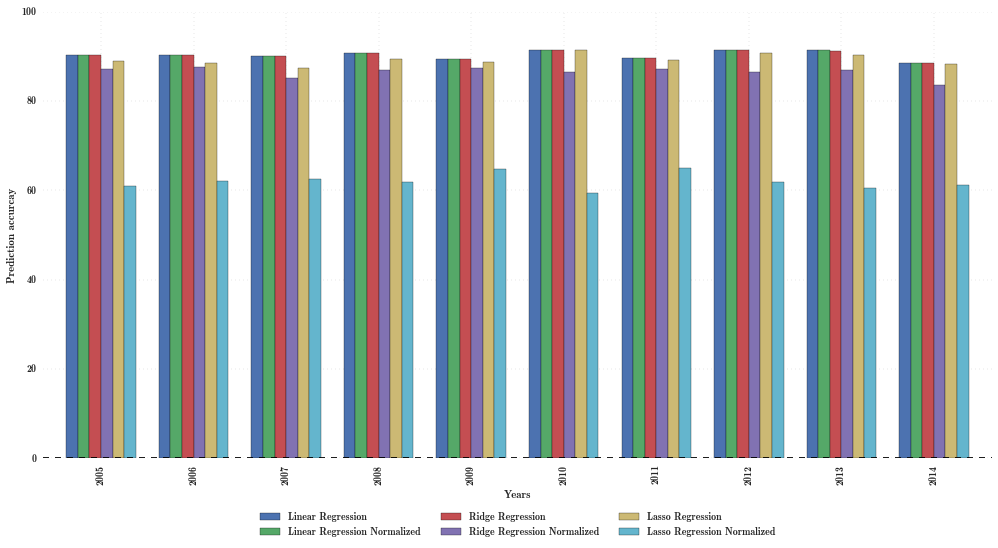

In [165]:
train_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

In [166]:
test_results = []
for model_name, model in models.iteritems():
    data_test = testDF[testDF.year > 2000]
    X_test = data_test.ix[:, features]
    y_test = data_test.ix[:, 'score_diff']
    predicted_test = model.predict(X_test)
    pt = [int(round(val)) for val in predicted_test]
    data_test['predicted_score_diff'] = pd.Series(pt, index=data_test.index)
    data_test['correct_prediction'] = data_test.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(data_test.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = data_test[data_test.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [model_name]
    test_results.append(accuracy.T)

test_resultdf = pd.concat(test_results).T
test_resultdf

,Ridge Regression Normalized,Lasso Regression Normalized,Lasso Regression,Ridge Regression,Linear Regression,Linear Regression Normalized
2005,84.027778,57.638889,87.152778,87.847222,87.847222,87.847222
2006,86.435331,61.514196,90.220820,90.536278,90.536278,90.536278
2007,87.381703,62.145110,92.429022,92.113565,92.113565,92.113565
2008,85.403727,63.975155,91.304348,92.236025,92.236025,92.236025
2009,87.654321,61.728395,90.740741,91.975309,91.975309,91.975309
2010,89.814815,62.345679,89.506173,89.814815,89.814815,89.814815
2011,84.615385,61.846154,88.000000,89.846154,89.846154,89.846154
2012,87.202381,59.821429,88.690476,91.369048,91.369048,91.369048
2013,89.570552,64.110429,93.558282,93.865031,93.865031,93.865031
2014,81.570997,60.422961,88.217523,88.519637,88.519637,88.519637


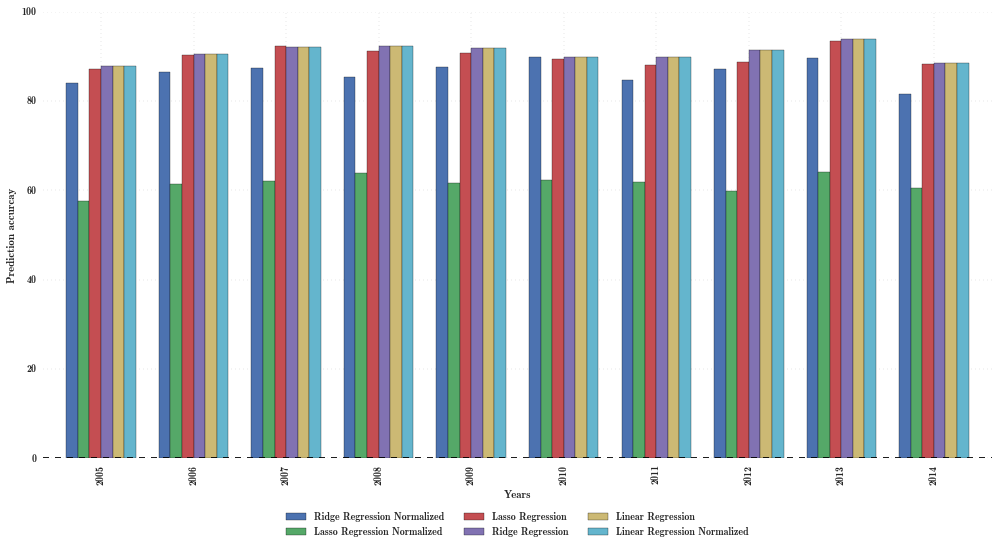

In [167]:
test_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()

---

In [168]:
# def get_game_features(g, gamesTillNow, itr, alpha):
#     hTeam = g.home_team
#     aTeam = g.away_team
#     gameYear = int(g.year)

#     games = []    
#     for row, game in gamesTillNow.iterrows():
#         rhTeam = game.home_team
#         raTeam = game.away_team
#         if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
#             games.append(pd.DataFrame(game).T)
#     games = games[-itr:]
#     numGames = len(games)
#     games = pd.concat(games)
#     games = games[features]
    
#     numGames = len(games.index)
#     weights = []
#     for i in xrange(1, numGames+1):
#         weights.append(alpha**i)
#     weights = np.array(weights)
#     average = (games.mul(weights[::-1], axis=0)/float(sum(weights)))
#     average = pd.DataFrame(average.sum()).T.apply(np.round)
#     return (numGames, average[features])

In [169]:
def get_game_features(g, gamesTillNow, itr, alpha):
    hTeam = g.home_team
    aTeam = g.away_team
    gameYear = int(g.year)
    

    games = []    
#     for row, game in gamesTillNow.iterrows():
#         rhTeam = game.home_team
#         raTeam = game.away_team
#         if ((rhTeam == hTeam) or (rhTeam == aTeam) or (raTeam == hTeam) or (raTeam == aTeam)):
#             games.append(pd.DataFrame(game).T)
    games = gamesTillNow.loc[(((gamesTillNow['home_team']==hTeam) | (gamesTillNow['away_team']==aTeam))|((gamesTillNow['home_team']==aTeam) | (gamesTillNow['away_team']==hTeam))),features]
    #games = gamesTillNow.loc[gamesTillNow['home_team']==hTeam | gamesTillNow['home_team']==aTeam | gamesTillNow['away_team']==hTeam | gamesTillNow['away_team']==aTeam,features]
    #games = games[-itr:]
    numGames = len(games)
    #games = pd.concat(games)
    #games = games[features]
    
    numGames = len(games.index)
    weights = []
    for i in xrange(1, numGames+1):
        weights.append(alpha**i)
    weights = np.array(weights)
    average = (games.mul(weights[::-1], axis=0)/float(sum(weights)))
    average = pd.DataFrame(average.sum()).T.apply(np.round)
    return (numGames, average[features])

In [170]:
test2_results = []
for model_name, model in models.iteritems():
    itr = 15
    alpha = 1
    mtemp = []
    data_test = testDF[testDF.year > 2007]
    for ix, game in data_test.iterrows():
        gamesTillNow = get_games_till_now(game, data)
        numGames, gameFeatures = get_game_features(game, gamesTillNow, itr, alpha)
        #print gameFeatures
        gameResult = run_model(model, gameFeatures)
        mtemp.append(gameResult)

    data_test['predicted_score_diff'] = pd.Series(mtemp, index=data_test.index)
    cols = ['year', 'week', 'home_team', 'away_team', 'home_score', 'away_score', 'winner', 'score_diff', 'predicted_score_diff']
    process = data_test[cols]
    process['error'] = process.score_diff - process.predicted_score_diff
    process['correct_prediction'] = process.apply(lambda x: get_correct(x['score_diff'], x['predicted_score_diff']), axis=1)
    years = [int(y) for y in unique(process.year)]
    ansdf = {}
    for y in years:
        ansdf[y] = process[process.year == y]
    accuracy = check_accuracy(ansdf)
    accuracy = pd.DataFrame(accuracy).T
    accuracy.columns = ['num_games', 'num_correct_prediction', 'pct_correct_prediction']
    accuracy = accuracy[['pct_correct_prediction']]
    accuracy.columns = [model_name]
    test2_results.append(accuracy.T)
    
test2_resultdf = pd.concat(test2_results).T
test2_resultdf

,Ridge Regression Normalized,Lasso Regression Normalized,Lasso Regression,Ridge Regression,Linear Regression,Linear Regression Normalized
2008,63.975155,63.975155,62.732919,63.043478,63.043478,63.043478
2009,61.728395,61.728395,60.802469,60.493827,60.493827,60.493827
2010,62.345679,62.345679,62.654321,62.037037,62.037037,62.037037
2011,61.846154,61.846154,61.846154,61.846154,61.846154,61.846154
2012,59.821429,59.821429,59.821429,59.523810,59.523810,59.523810
2013,64.110429,64.110429,64.110429,64.110429,64.110429,64.110429
2014,60.422961,60.422961,60.422961,60.120846,60.120846,60.120846


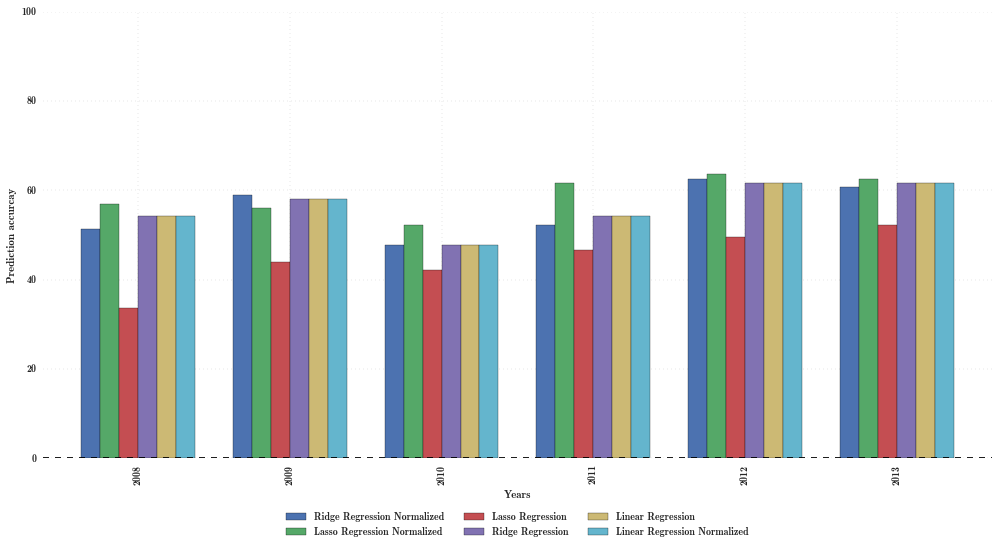

In [27]:
test2_resultdf.plot(kind='bar', figsize=(17, 8))
plt.grid(b=True, which='major', color='gray', linestyle=':')
plt.xlabel('Years')
plt.ylabel('Prediction accurcay')
plt.ylim([0, 100])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)
plt.show()